## Country Clustering using K-means and Hierarchical 

### Summary

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

I have to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then I need to suggest the countries which the CEO needs to focus on the most.

### Objectives

My main task is to cluster the countries by the factors mentioned above and then present the solution. The following approach is suggested :

Start off with the necessary data inspection and EDA tasks suitable for this dataset - data cleaning, univariate analysis, bivariate analysis etc.

Outlier Analysis: We must perform the Outlier Analysis on the dataset. However, We do have the flexibility of not removing the outliers if it suits the business needs or a lot of countries are getting removed. Hence, all we need to do is find the outliers in the dataset, and then choose whether to keep them or remove them depending on the results We get.
Try both K-means and Hierarchical clustering(both single and complete linkage) on this dataset to create the clusters. [Note that both the methods may not produce identical results and We might have to choose one of them for the final list of countries.]

Analyse the clusters and identify the ones which are in dire need of aid. We can analyse the clusters by comparing how these three variables - [gdpp, child_mort and income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.

Also, We need to perform visualisations on the clusters that have been formed. We can do this by choosing any two of the three variables mentioned above on the X-Y axes and plotting a scatter plot of all the countries and differentiating the clusters. Make sure We create visualisations for all the three pairs. We can also choose other types of plots like boxplots, etc.

Both K-means and Hierarchical may give different results because of previous analysis (whether We chose to keep or remove the outliers, how many clusters We chose, etc.) Hence, there might be some subjectivity in the final number of countries that We think should be reported back to the CEO since they depend upon the preceding analysis as well. Here, make sure that We report back at least 5 countries which are in direst need of aid from the analysis work that we perform.

### Data Collection/Reading

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing numpy and panda libraries
import numpy as np
import pandas as pd

#Importing matplotlib and seaborn libraries for visualization purpose
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#Importing dependent libraries for Machine Learning, performing K-means and Hierarchical clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
#Lets read the country data in df dataframe

df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Data Inspection and Null values check

In [4]:
#Checking the shape of the data
df.shape

(167, 10)

In [5]:
#Checking the info of the data
df.info

<bound method DataFrame.info of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2      

In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
#Lets check if any of the columns have any null values
round(100*(df.isnull().sum())/len(df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

There are no null values found

In [8]:
#From Data dictionary we can find that exports, health and imports values are mentioned in percentage w.r.t gdpp
#So lets convert them in actual values

df['exports'] = df['exports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100
df['imports'] = df['health']*df['gdpp']/100

In [9]:
df['exports'].head()

0      55.30
1    1145.20
2    1712.64
3    2199.19
4    5551.00
Name: exports, dtype: float64

In [10]:
df['health'].head()

0     41.9174
1    267.8950
2    185.9820
3    100.6050
4    735.6600
Name: health, dtype: float64

In [11]:
df['imports'].head()

0      231.803222
1    10956.905500
2     8294.797200
3     3551.356500
4    89750.520000
Name: imports, dtype: float64

In [12]:
#So the overall data will be:

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,231.803222,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,10956.905500,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,8294.797200,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,3551.356500,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,89750.520000,19100,1.44,76.8,2.13,12200


### Exploratory Data Analysis

We need to choose the countries that are in the direst need of aid. Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country.

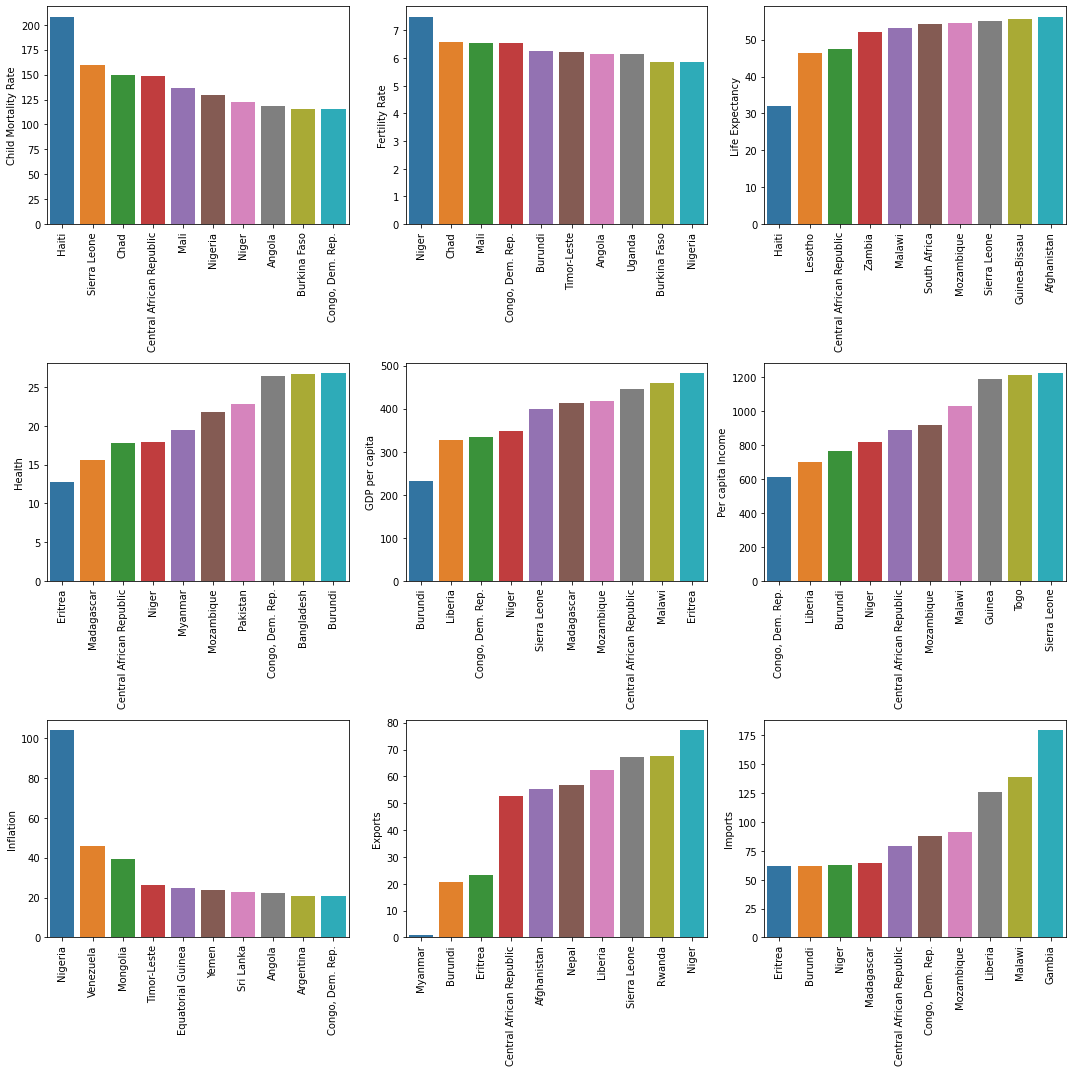

In [13]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom10_health = df[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom10_income = df[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = df[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = df[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()
    

From the above visualizations, we can find the overall conditions of the countries which are at very critical positions.

From the 1st and 3rd Fig. we can clearly observe that **Haiti** has the highest Child Mortality Rate and even the Life expectancy is very low.

From Fig.4 it is oberved that Health facilities in **Eritrea, Burundi, Niger and Madagascar** is extremely poor.

Fig 5. and Fig. 6 showcases that countries like **Burundi, Liberia and Congo Dem Rep** has the lowest GDP and income

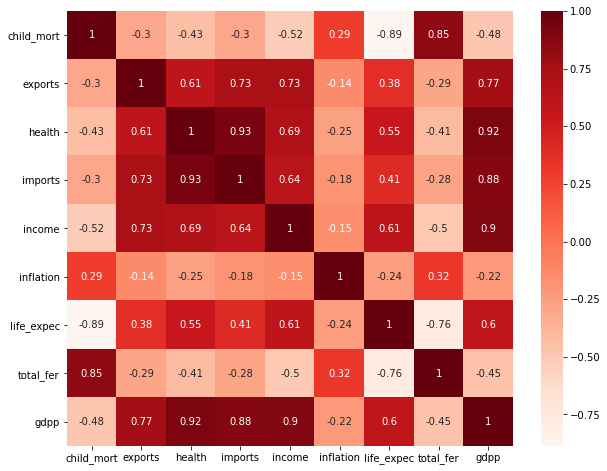

In [14]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap="Reds")
plt.savefig('corrplot')
plt.show()

child_mortality and life_expentency are highly correlated with correlation of -0.89

child_mortality and total_fertility are highly correlated with correlation of 0.85

imports and exports are highly correlated with correlation of 0.74

life_expentency and total_fertility are highly correlated with correlation of -0.76

In [15]:
df_final = df.copy()
country = df_final.pop('country')

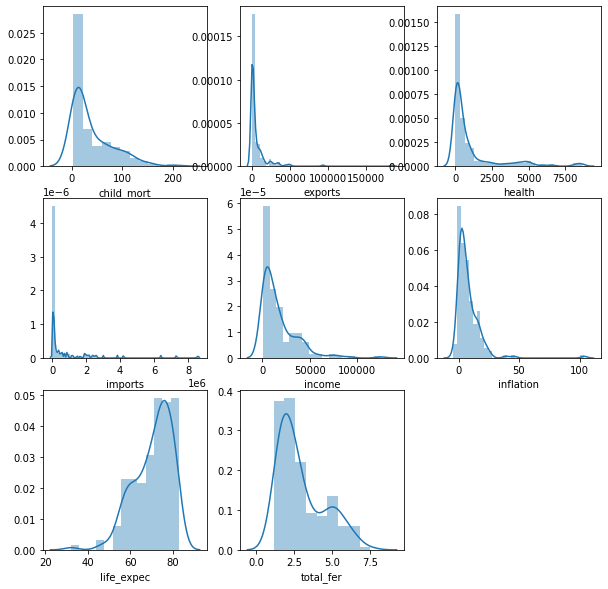

In [16]:
#Lets create a histogram to just get an overall idea of the distribution of all the variables

plt.figure(figsize = (10,10))
feature = df_final.columns[:-1]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(df[i[1]])

### Outlier Analysis

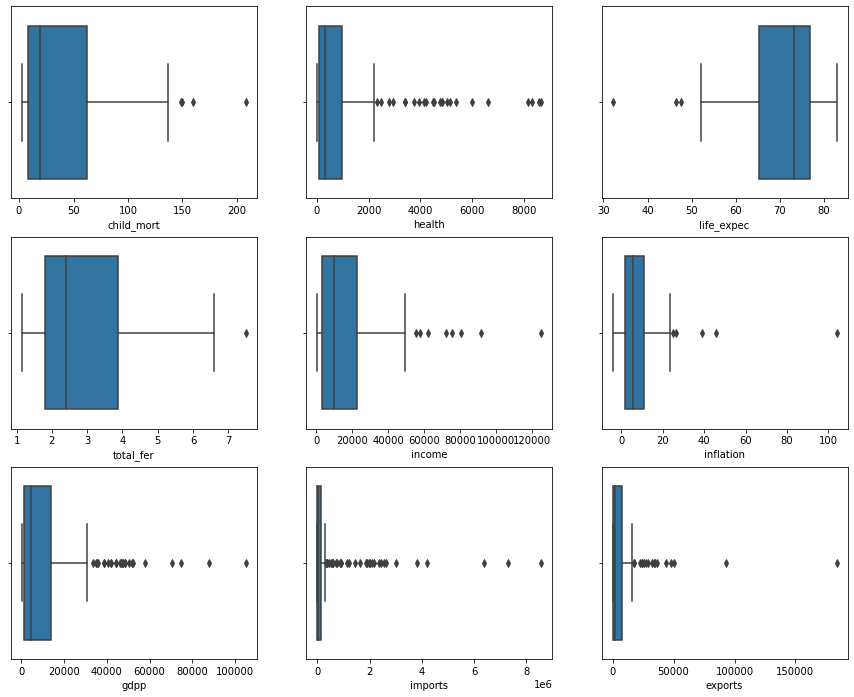

In [17]:
#To check if the data has outliers, we will plot the boxplot.

fig, axs = plt.subplots(3,3, figsize = (15,12))
plt1 = sns.boxplot(df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df['health'], ax = axs[0,1])
plt3 = sns.boxplot(df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df['income'], ax = axs[1,1])
plt6 = sns.boxplot(df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df['exports'], ax = axs[2,2])

As we can see from the above charts that variables like exports/imports, health, income, inflation and gdpp have high number of outliers. 

So, we will be capping the upper range of outliers by handling them using capping techniques where in we will limit the extreme variables upto a particular range.

We also have few outliers in Child Mortality but we wont cap them since it is our target vaiable and we need the countries which have high number of child mortality. 

In [18]:
# capping variables

q4export = df['exports'].quantile(0.90)
df['exports'][df['exports']>= q4export] = q4export

q4imports = df['imports'].quantile(0.70)
df['imports'][df['imports']>= q4imports] = q4imports

q4health = df['health'].quantile(0.80)
df['health'][df['health']>= q4health] = q4health

q4income = df['income'].quantile(0.80)
df['income'][df['income']>= q4income] = q4income

q4inflation = df['inflation'].quantile(0.90)
df['inflation'][df['inflation']>= q4inflation] = q4inflation

q4gdpp = df['gdpp'].quantile(0.80)
df['gdpp'][df['gdpp']>= q4gdpp] = q4gdpp

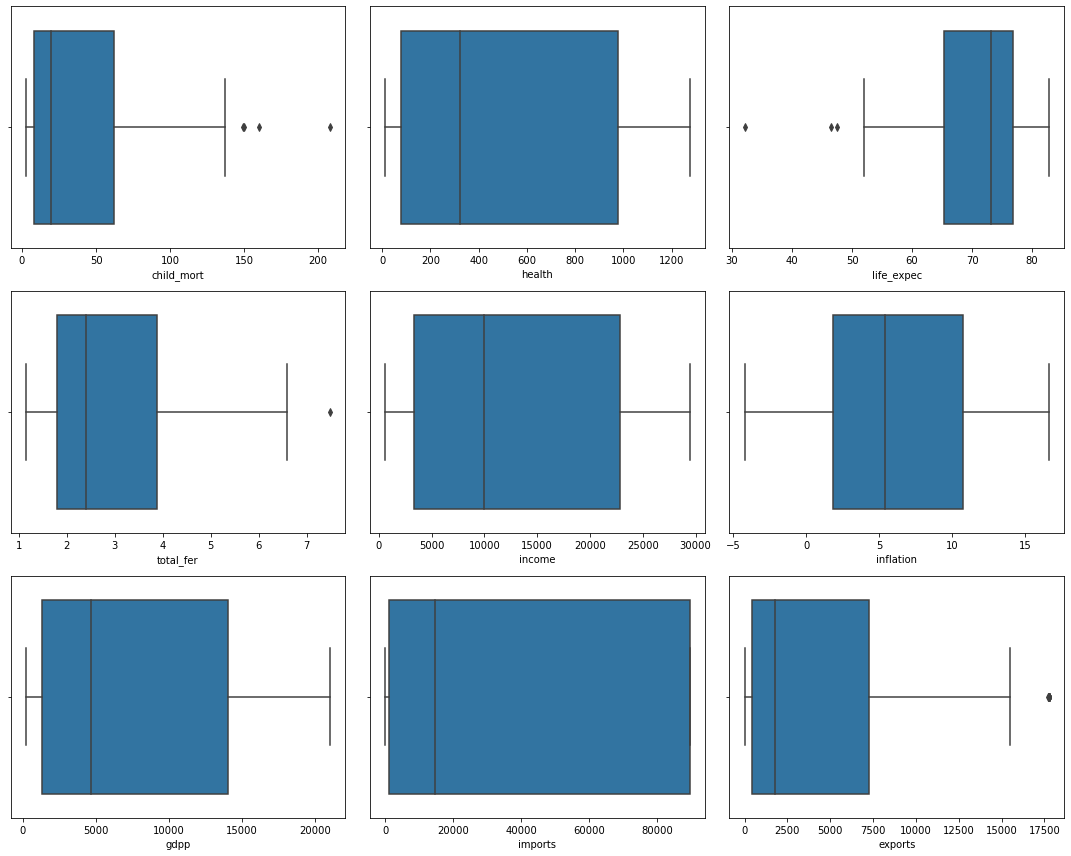

In [19]:
#Plotting boxplot again after applying capping

fig, axs = plt.subplots(3,3, figsize = (15,12))
plt1 = sns.boxplot(df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df['health'], ax = axs[0,1])
plt3 = sns.boxplot(df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df['income'], ax = axs[1,1])
plt6 = sns.boxplot(df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df['exports'], ax = axs[2,2])

plt.tight_layout()

In [20]:
# Dropping Country field as final dataframe will only contain data columns

df_final = df.copy()
country = df_final.pop('country')

In [21]:
df_final.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,231.803222,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,10956.905500,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,8294.797200,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,3551.356500,5900.0,16.64,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,89537.904000,19100.0,1.44,76.8,2.13,12200.0


### Hopkins Statistics Test

The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set. It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed. A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [22]:
# Lets Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [23]:
#Running the hopkins test on our data set.

hopkins(df_final)

0.906068973004188

Since Hopkins score is above 0.8, It has a good tendency of clusters.

### Rescaling the features

There are two common ways of rescaling:

Min-Max scaling

Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [24]:
# Standarisation technique for scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final)

In [25]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns[:-1])
df_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-0.797286,-0.968808,-0.936269,-1.114450,0.497660,-1.619092,1.902882,-0.988230
1,-0.538949,-0.611636,-0.494736,-0.659339,-0.325535,-0.368728,0.647866,-0.859973,-0.534548
2,-0.272833,-0.514980,-0.666579,-0.728077,-0.043915,1.663346,0.670423,-0.038404,-0.487089
3,2.007808,-0.432103,-0.845689,-0.850556,-0.707666,1.757861,-1.179234,2.128151,-0.606378
4,-0.695634,0.138833,0.486576,1.369677,0.543979,-0.902563,0.704258,-0.541946,0.505701


### Model Building

#### K-means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

First we initialize k points, called means, randomly. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far. We repeat the process for a given number of iterations and at the end, we have our clusters.

### Finding the Optimal Number of Clusters

#### Silhouette Analysis

silhouette score=(p−q)/max(p,q)

p is the mean distance to the points in the nearest cluster that the data point is not a part of

q is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

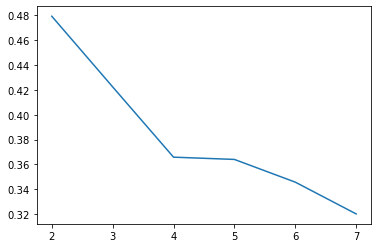

In [26]:
# Let us find the Silhouette score analysis to find the ideal number of clusters for K-means clustering

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 8):
    kmean = KMeans(n_clusters = k).fit(df_scaled)
    ss.append([k, silhouette_score(df_scaled, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

In [27]:
#Let us check the silhouette score for each cluster froim 2-8

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4793813256668367
For n_clusters=3, the silhouette score is 0.4224254255261363
For n_clusters=4, the silhouette score is 0.3649568652700968
For n_clusters=5, the silhouette score is 0.3626223275395044
For n_clusters=6, the silhouette score is 0.34230764693654714
For n_clusters=7, the silhouette score is 0.321919057725873
For n_clusters=8, the silhouette score is 0.3227500632243958


From the above analysis, it is observed that Clusters=3 will be optimal number for clustering.

#### Elbow Curve

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

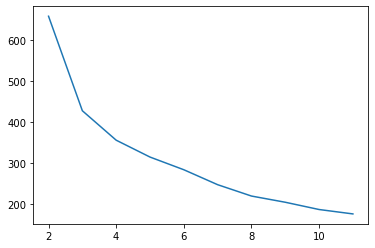

In [28]:
# Elbow curve method to find the ideal number of clusters.
ssd = []
for k in range(2, 12):
    kmean = KMeans(n_clusters = k).fit(df_scaled)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

Looking at the above elbow curve it looks good to proceed with 3 clusters.

In [29]:
#Applying K-means with k=3 clusters

kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df_scaled)

KMeans(n_clusters=3, random_state=50)

In [30]:
P = kmean.predict(df_scaled)

In [31]:
#Creating a copy of df
df_kmean = df.copy()

In [32]:
#Assigning Labels

label  = pd.DataFrame(kmean.labels_, columns= ['label1'])
label.head()

df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label1
0,Afghanistan,90.2,55.30,41.9174,231.803222,1610.0,9.440,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,10956.905500,9930.0,4.490,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,8294.797200,12900.0,16.100,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,3551.356500,5900.0,16.640,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,89537.904000,19100.0,1.440,76.8,2.13,12200.0,2
5,Argentina,14.5,1946.70,834.3000,85932.900000,18700.0,16.640,75.8,2.37,10300.0,1
6,Armenia,18.1,669.76,141.6800,4562.096000,6700.0,7.770,73.3,1.69,3220.0,1
7,Australia,4.8,10276.20,1274.6460,89537.904000,29420.0,1.160,82.0,1.93,21020.0,2
8,Austria,4.3,17760.60,1274.6460,89537.904000,29420.0,0.873,80.5,1.44,21020.0,2
9,Azerbaijan,39.2,3171.12,343.3920,20054.092800,16000.0,13.800,69.1,1.92,5840.0,1


In [33]:
#Let us check the value counts for each labels

df_kmean.label1.value_counts()

1    75
2    50
0    42
Name: label1, dtype: int64

It is observed that there are sufficient number of countries for each label.

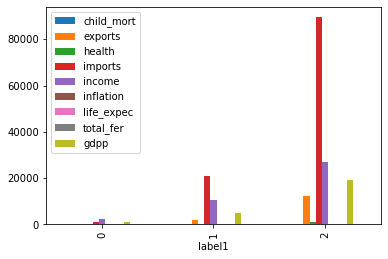

In [34]:
#Let us visualize the labelled dataframe

df_kmean.groupby('label1').mean().plot(kind = 'bar')

From the above visualization, it is observed that **Label=0** have countries with poor financial and health conditions

In [35]:
#Let us check all the countries with Label=0

df_kmean[df_kmean['label1'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label1
0,Afghanistan,90.2,55.3000,41.9174,231.803222,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.1900,100.6050,3551.356500,5900.0,16.640,60.1,6.16,3530.0,0
17,Benin,111.0,180.4040,31.0780,235.571240,1820.0,0.885,61.8,5.36,758.0,0
25,Burkina Faso,116.0,110.4000,38.7550,222.841250,1430.0,6.810,57.9,5.87,575.0,0
26,Burundi,93.6,20.6052,26.7960,61.898760,764.0,12.300,57.7,6.26,231.0,0
28,Cameroon,108.0,290.8200,67.2030,880.359300,2660.0,1.910,57.3,5.11,1310.0,0
31,Central African Republic,149.0,52.6280,17.7508,79.168568,888.0,2.010,47.5,5.21,446.0,0
32,Chad,150.0,330.0960,40.6341,364.487877,1930.0,6.390,56.5,6.59,897.0,0
36,Comoros,88.2,126.8850,34.6819,266.703811,1410.0,3.870,65.9,4.75,769.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,88.240796,609.0,16.640,57.5,6.54,334.0,0


In [36]:
#As per our requirement, we need to sort all the countries with poor financial, health and socio-economic condition on basis of gdpp, child_mort and income.

df_final_countries1 = df_kmean[df_kmean['label1'] == 0].sort_values(by = ['gdpp', 'child_mort','income'], ascending = [True,False,True]).head(10)

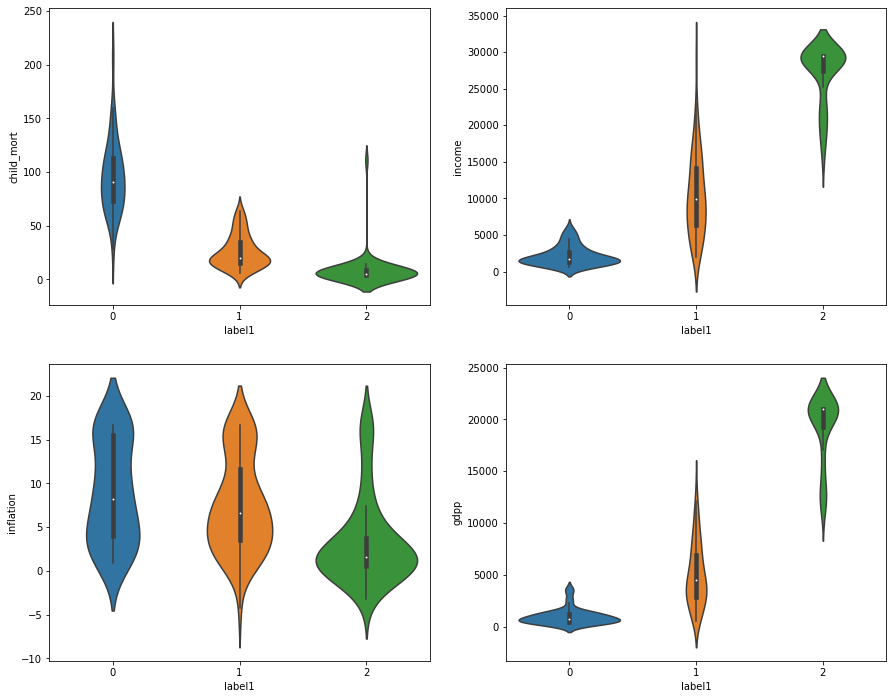

In [37]:
 #Let us plot the Violin plot to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'label1', y = 'child_mort', data = df_kmean,ax=axes[0][0])
sns.violinplot(x = 'label1', y = 'income', data = df_kmean,ax=axes[0][1])
sns.violinplot(x = 'label1', y = 'inflation', data=df_kmean,ax=axes[1][0])
sns.violinplot(x = 'label1', y = 'gdpp', data=df_kmean,ax=axes[1][1])
plt.show()

In [38]:
#Let us find the list of top 5 countries from this dataframe which are in most need of financial aid according to K-means.
df_final_countries1.reset_index(drop=True).country[:5]

0             Burundi
1             Liberia
2    Congo, Dem. Rep.
3               Niger
4        Sierra Leone
Name: country, dtype: object

#### Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

Divisive
Agglomerative.

**Single Linkage**

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

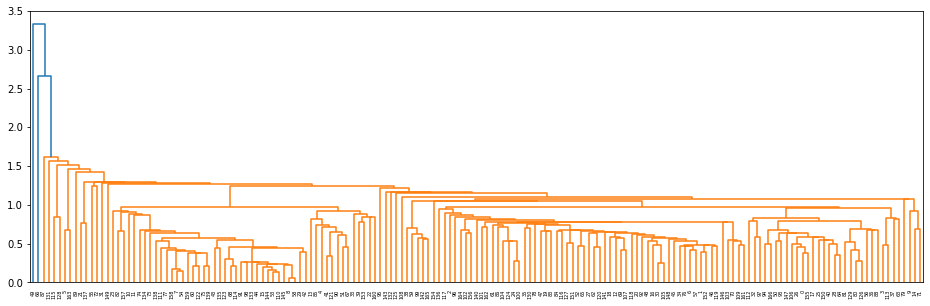

In [39]:
#Single Linkage
plt.figure(figsize = (16,5))

mergings = linkage(df_scaled, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

**Complete Linkage**

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

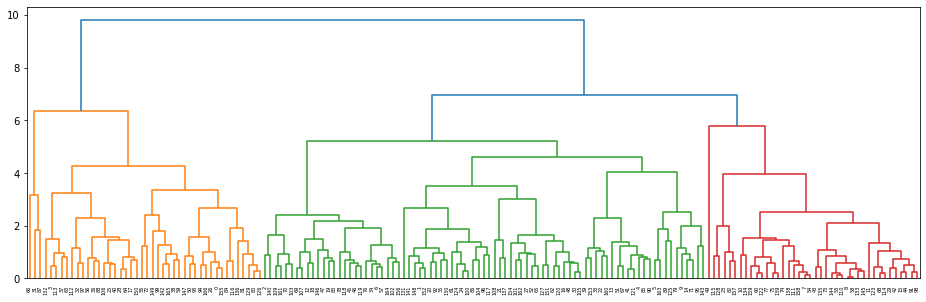

In [40]:
# complete linkage

plt.figure(figsize = (16,5))
mergings = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [41]:
# Let cut the tree at height of approx 7 to get 3 clusters and see if it get any better cluster formation.
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [42]:
#Assigning Labels
label2  = pd.DataFrame(cluster_labels, columns= ['label2'])
label2.head()

,label2
0,0
1,1
2,1
3,0
4,1


In [43]:
#Concating the dataframe with new hierarchial labels

df_hierarchical_kmean = pd.concat([df_kmean, label2], axis =1)
df_hierarchical_kmean.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label1,label2
0,Afghanistan,90.2,55.30,41.9174,231.803222,1610.0,9.440,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,10956.905500,9930.0,4.490,76.3,1.65,4090.0,1,1
2,Algeria,27.3,1712.64,185.9820,8294.797200,12900.0,16.100,76.5,2.89,4460.0,1,1
3,Angola,119.0,2199.19,100.6050,3551.356500,5900.0,16.640,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,89537.904000,19100.0,1.440,76.8,2.13,12200.0,2,1
5,Argentina,14.5,1946.70,834.3000,85932.900000,18700.0,16.640,75.8,2.37,10300.0,1,1
6,Armenia,18.1,669.76,141.6800,4562.096000,6700.0,7.770,73.3,1.69,3220.0,1,1
7,Australia,4.8,10276.20,1274.6460,89537.904000,29420.0,1.160,82.0,1.93,21020.0,2,2
8,Austria,4.3,17760.60,1274.6460,89537.904000,29420.0,0.873,80.5,1.44,21020.0,2,2
9,Azerbaijan,39.2,3171.12,343.3920,20054.092800,16000.0,13.800,69.1,1.92,5840.0,1,1


In [44]:
#Let us check the value counts for each labels of Hierarchial clustering

df_hierarchical_kmean.label2.value_counts()

1    83
0    44
2    40
Name: label2, dtype: int64

We can see that their are sufficient values for each labels

In [45]:
#Let us check the value counts for each labels of k-Means clustering

df_hierarchical_kmean.label1.value_counts()

1    75
2    50
0    42
Name: label1, dtype: int64

It is observed that number of countries differ for both labels. i.e using differnt clustering methods, we can find that clustering differs.

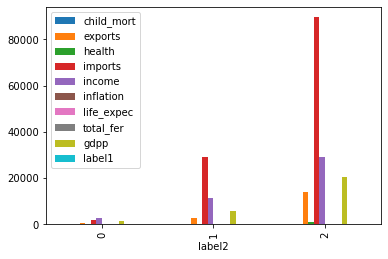

In [46]:
#Let us visualize clusters for Hierarchial clustering

df_hierarchical_kmean.groupby('label2').mean().plot(kind = 'bar')

In [47]:
#Let us check all the countries with Label=0

df_hierarchical_kmean[df_hierarchical_kmean['label2'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label1,label2
0,Afghanistan,90.2,55.3000,41.9174,231.803222,1610.0,9.440,56.2,5.82,553.0,0,0
3,Angola,119.0,2199.1900,100.6050,3551.356500,5900.0,16.640,60.1,6.16,3530.0,0,0
17,Benin,111.0,180.4040,31.0780,235.571240,1820.0,0.885,61.8,5.36,758.0,0,0
25,Burkina Faso,116.0,110.4000,38.7550,222.841250,1430.0,6.810,57.9,5.87,575.0,0,0
26,Burundi,93.6,20.6052,26.7960,61.898760,764.0,12.300,57.7,6.26,231.0,0,0
28,Cameroon,108.0,290.8200,67.2030,880.359300,2660.0,1.910,57.3,5.11,1310.0,0,0
31,Central African Republic,149.0,52.6280,17.7508,79.168568,888.0,2.010,47.5,5.21,446.0,0,0
32,Chad,150.0,330.0960,40.6341,364.487877,1930.0,6.390,56.5,6.59,897.0,0,0
36,Comoros,88.2,126.8850,34.6819,266.703811,1410.0,3.870,65.9,4.75,769.0,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,88.240796,609.0,16.640,57.5,6.54,334.0,0,0


In [48]:
#As per our requirement, we need to sort all the countries with poor financial, health and socio-economic condition on basis of gdpp, child_mort and income.

df_final_countries = df_hierarchical_kmean[df_hierarchical_kmean['label2'] == 0].sort_values(by = ['gdpp', 'child_mort','income'], ascending = [True,False,True]).head(10)

In [49]:
df_final_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label1,label2
26,Burundi,93.6,20.6052,26.7960,61.898760,764.0,12.30,57.7,6.26,231.0,0,0
88,Liberia,89.3,62.4570,38.5860,126.176220,700.0,5.47,60.8,5.02,327.0,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,88.240796,609.0,16.64,57.5,6.54,334.0,0,0
112,Niger,123.0,77.2560,17.9568,62.489664,814.0,2.55,58.8,7.49,348.0,0,0
132,Sierra Leone,160.0,67.0320,52.2690,208.553310,1220.0,16.64,55.0,5.20,399.0,0,0


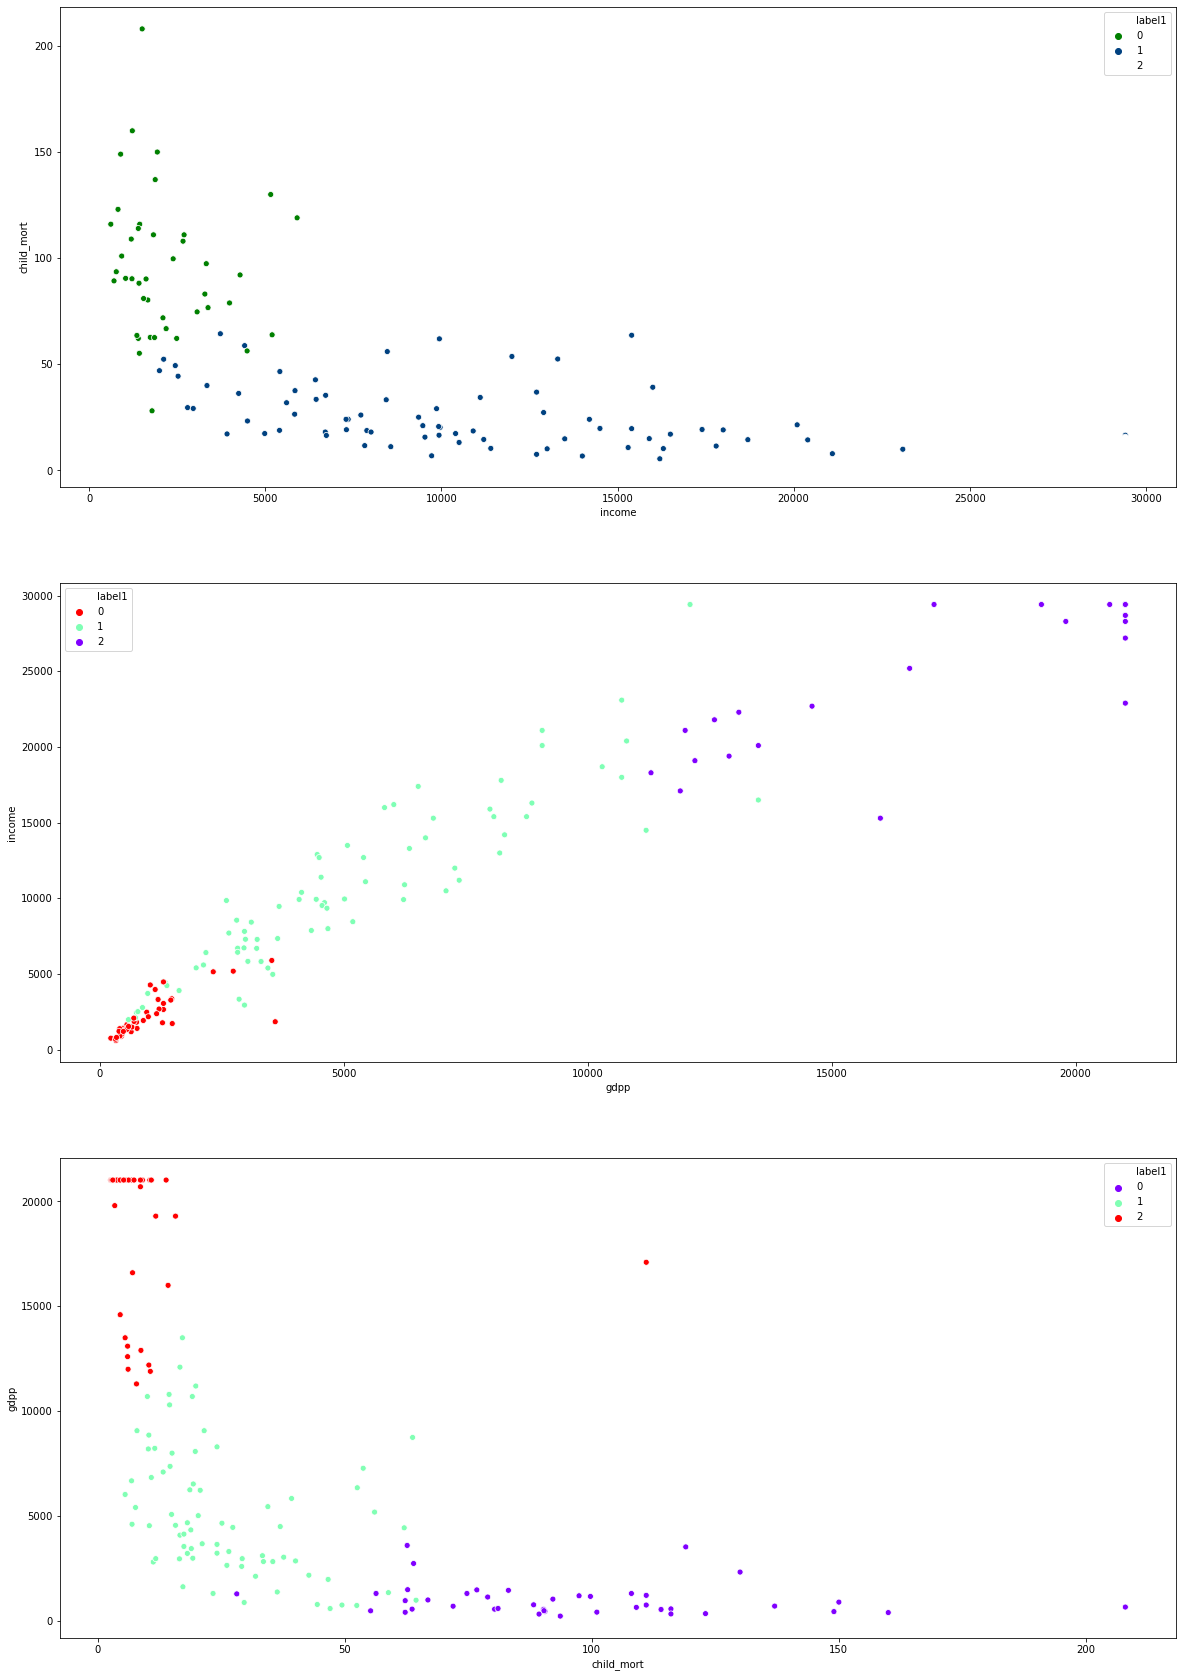

In [50]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (20,30))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='label1',data = df_hierarchical_kmean,legend='full',palette="ocean")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='label1', data = df_hierarchical_kmean,legend='full',palette="rainbow_r")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='label1', data=df_hierarchical_kmean,legend='full',palette="rainbow")
plt.show()

For the target attributes, we can find the spread of the data and different clusters in different colors.

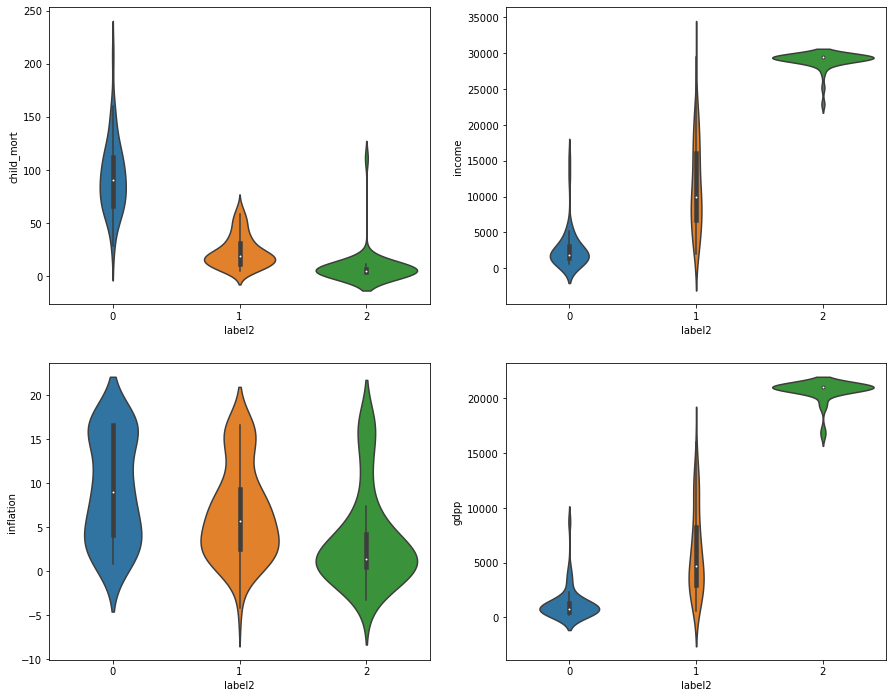

In [51]:
 #Violin plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'label2', y = 'child_mort', data = df_hierarchical_kmean,ax=axes[0][0])
sns.violinplot(x = 'label2', y = 'income', data = df_hierarchical_kmean,ax=axes[0][1])
sns.violinplot(x = 'label2', y = 'inflation', data=df_hierarchical_kmean,ax=axes[1][0])
sns.violinplot(x = 'label2', y = 'gdpp', data=df_hierarchical_kmean,ax=axes[1][1])
plt.show()

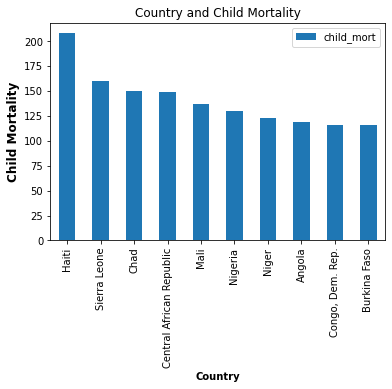

In [52]:
# BarPlot for Child Mortality of countries which are in need of aid

df_list_cm = pd.DataFrame(df_hierarchical_kmean.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
df_list_cm.head(10).plot.bar()
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

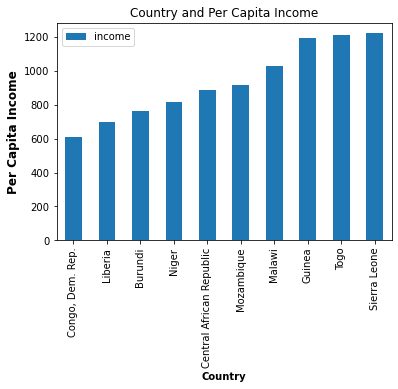

In [53]:
df_list_in = pd.DataFrame(df_hierarchical_kmean.groupby(['country'])['income'].mean().sort_values(ascending = True))
df_list_in.head(10).plot.bar()
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

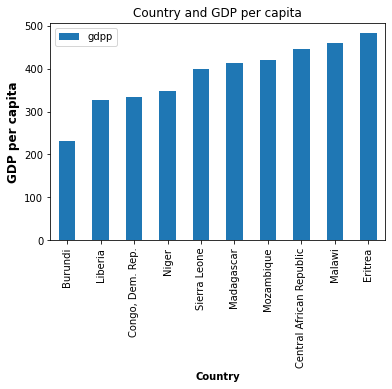

In [54]:
# BarPlot for gdp which are in need of aid

df_list_gdp = pd.DataFrame(df_hierarchical_kmean.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
df_list_gdp.head(10).plot.bar()
plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

In [55]:
df_final_countries.reset_index(drop=True).country[:5]

0             Burundi
1             Liberia
2    Congo, Dem. Rep.
3               Niger
4        Sierra Leone
Name: country, dtype: object

According to K-means and Hierarchical clustering process, we have found the top 5 countries for Supporting help who have high child mortality, low income & low GDP